In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start='2012-01-01'
end='2021-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624948
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765111
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898556
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097


In [3]:
df=df.reset_index()

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624948
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765111
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898556
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,14.732143,14.607143,14.621429,14.686786,302220800.0
1,14.810000,14.617143,14.642857,14.765714,260022000.0
2,14.948214,14.738214,14.819643,14.929643,271269600.0
3,15.098214,14.972143,14.991786,15.085714,318292800.0
4,15.276786,15.048214,15.196429,15.061786,394024400.0


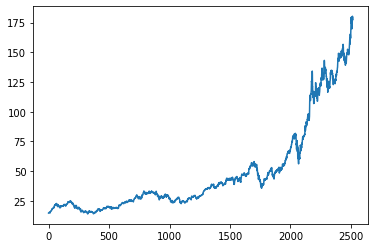

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    153.3444
2513    153.6667
2514    153.9991
2515    154.3202
2516    154.6399
Name: Close, Length: 2517, dtype: float64

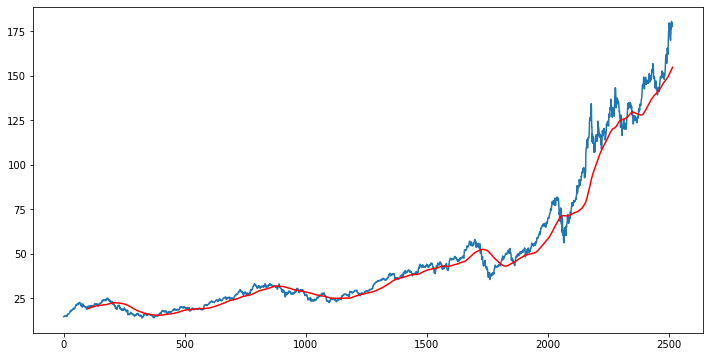

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    142.85570
2513    143.13220
2514    143.40125
2515    143.66845
2516    143.95365
Name: Close, Length: 2517, dtype: float64

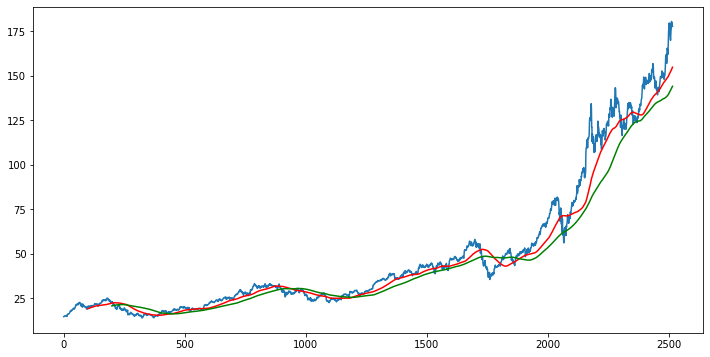

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2517, 5)

In [13]:
#splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])  # we are only interested in close column so only splitting that
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [14]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))   #Transform features by scaling each feature to a given range.

In [15]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.56977531],
       [0.57834128],
       [0.57936234]])

In [16]:
x_train=[]
y_train=[]

In [17]:
data_training_array.shape

(1761, 1)

In [18]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [19]:
# ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from tensorflow import keras
import tensorflow as tf

In [21]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 18s 259ms/step - loss: 0.0334
Epoch 2/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0073
Epoch 3/50
52/52 [==============================] - 14s 276ms/step - loss: 0.0067
Epoch 4/50
52/52 [==============================] - 13s 245ms/step - loss: 0.0058
Epoch 5/50
52/52 [==============================] - 12s 233ms/step - loss: 0.0049
Epoch 6/50
52/52 [==============================] - 13s 258ms/step - loss: 0.0050
Epoch 7/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0051
Epoch 8/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0048
Epoch 9/50
52/52 [==============================] - 13s 260ms/step - loss: 0.0050
Epoch 10/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0044
Epoch 11/50
52/52 [==============================] - 13s 247ms/step - loss: 0.0042
Epoch 12/50
52/52 [==============================] - 13s 248ms/step - loss: 0.0038
Epoch 13/50
5

In [24]:
model.save("keras_model01.h5")

In [26]:
model_new=tf.keras.models.load_model("keras_model01.h5")
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
data_testing.head()

,Close
1761,35.547501
1762,37.064999
1763,36.982498
1764,37.687500
1765,38.327499


In [28]:
data_training.tail(100)

,Close
1661,52.220001
1662,51.882500
1663,52.217499
1664,52.437500
1665,52.560001
...,...
1756,39.292500
1757,39.037498
1758,39.057499
1759,39.435001


In [29]:
past_100_days=data_training.tail(100)

In [30]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)

In [31]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.1151555 ],
       [0.1128244 ],
       [0.11513821],
       [0.11665774],
       [0.11750385],
       [0.12282217],
       [0.13017802],
       [0.12651737],
       [0.12579212],
       [0.1258094 ],
       [0.12656917],
       [0.12772607],
       [0.13079965],
       [0.13383868],
       [0.13950234],
       [0.14304214],
       [0.14753165],
       [0.14879215],
       [0.14621932],
       [0.13970957],
       [0.13660145],
       [0.13147307],
       [0.14100462],
       [0.13620431],
       [0.14542503],
       [0.14098733],
       [0.13069605],
       [0.13131767],
       [0.13154213],
       [0.1344085 ],
       [0.13031616],
       [0.13572081],
       [0.13813824],
       [0.13508192],
       [0.142904  ],
       [0.14426813],
       [0.14689274],
       [0.15038074],
       [0.15519832],
       [0.14815327],
       [0.14176435],
       [0.14086647],
       [0.14621932],
       [0.12807141],
       [0.12477336],
       [0.1380001 ],
       [0.12979814],
       [0.138

In [32]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [34]:
#making predictions

y_predicted=model.predict(x_test)

In [35]:
scaler.scale_

array([0.00690691])

In [36]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

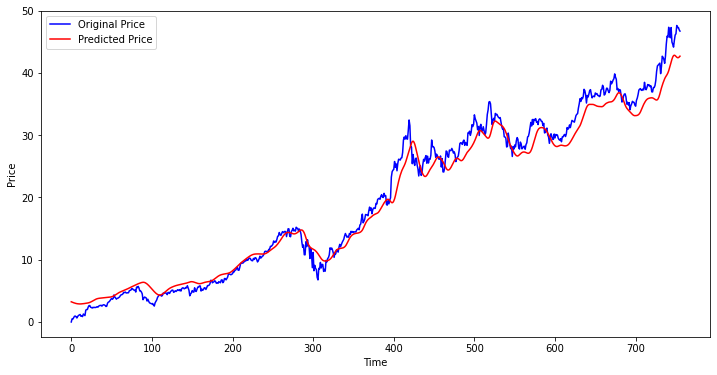

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()